<a href="https://colab.research.google.com/github/IsuruKasun/test/blob/master/CarData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Import Data Frame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

directory_Path = '/content/drive/MyDrive/car data'

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/car data.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


Cleaning the data frame

In [ ]:
df.shape

(301, 9)

In [ ]:
# finding what are the unique names in the data set 
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [ ]:
# check missing or null values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#remove the car name from the features because we donot need names to predict the price value of car 
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#the depreciation value of car is improtant when predict tha car value. the depreciation of the car depend on the car year.
#Therefore, make a new feature to find that how old is the car 
final_dataset['Current_Year'] = 2023

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [ ]:
final_dataset['Number_of_Year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)
#operation should be performed along the columns axis. In pandas, the columns axis has an index of 1 while the rows axis has an index of 0.
#The last argument inplace=True indicates that the operation should be performed in place, that is, the original DataFrame final_dataset will be modified, rather than creating a new DataFrame.


In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)
# pd.get_dummies() is a method in the pandas library that is used to convert categorical variables into numerical variables.
# drop_first parameter is set to True, change the same data frame
# fule_type_diesel = 1 (it is a diesel car), fule_type_petrol = 1 (it is a pettrol car), if both are zero, it is a CNG car. (dummy function)
 

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
final_dataset.shape

(301, 9)

In [ ]:
# finding the corelations. how one fearute is corelated to others 
final_dataset.corr()


,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [ ]:
import seaborn as sns
#  Python data visualization library

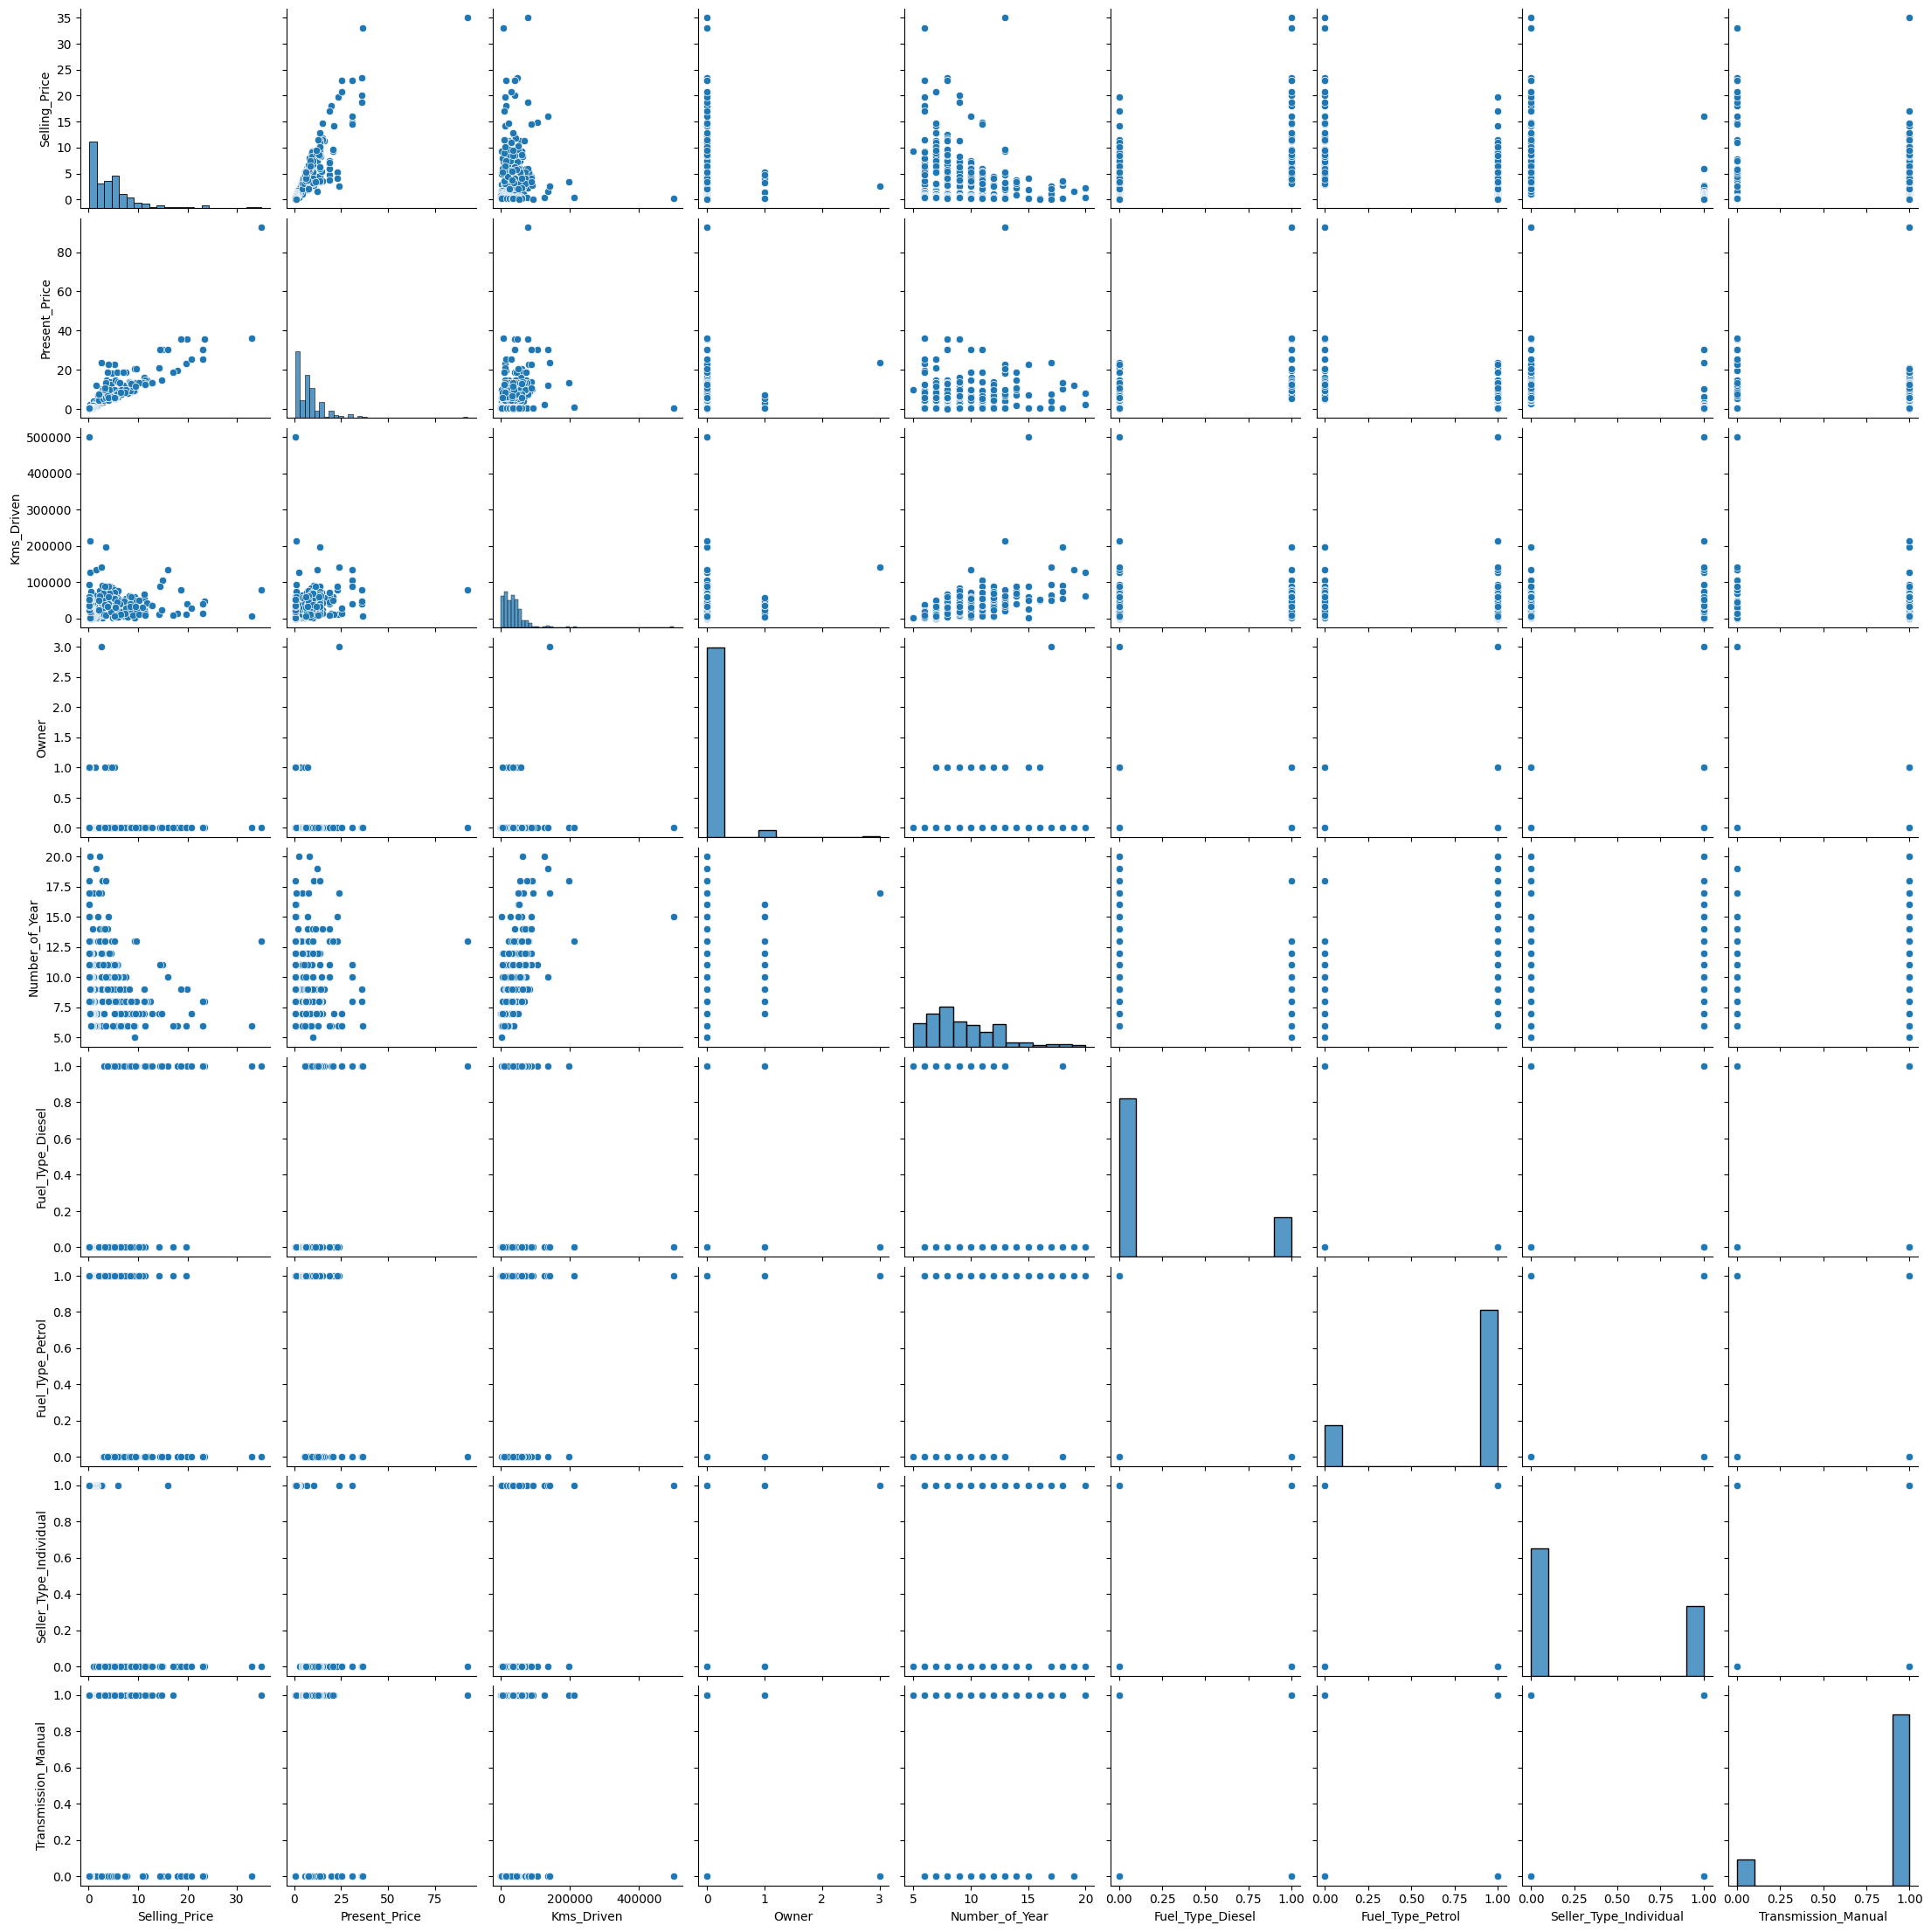

In [ ]:
sns.pairplot(final_dataset)

In [ ]:
# plot the same thing in order to heat map to get more acurate plots
import matplotlib.pyplot as plt
%matplotlib inline


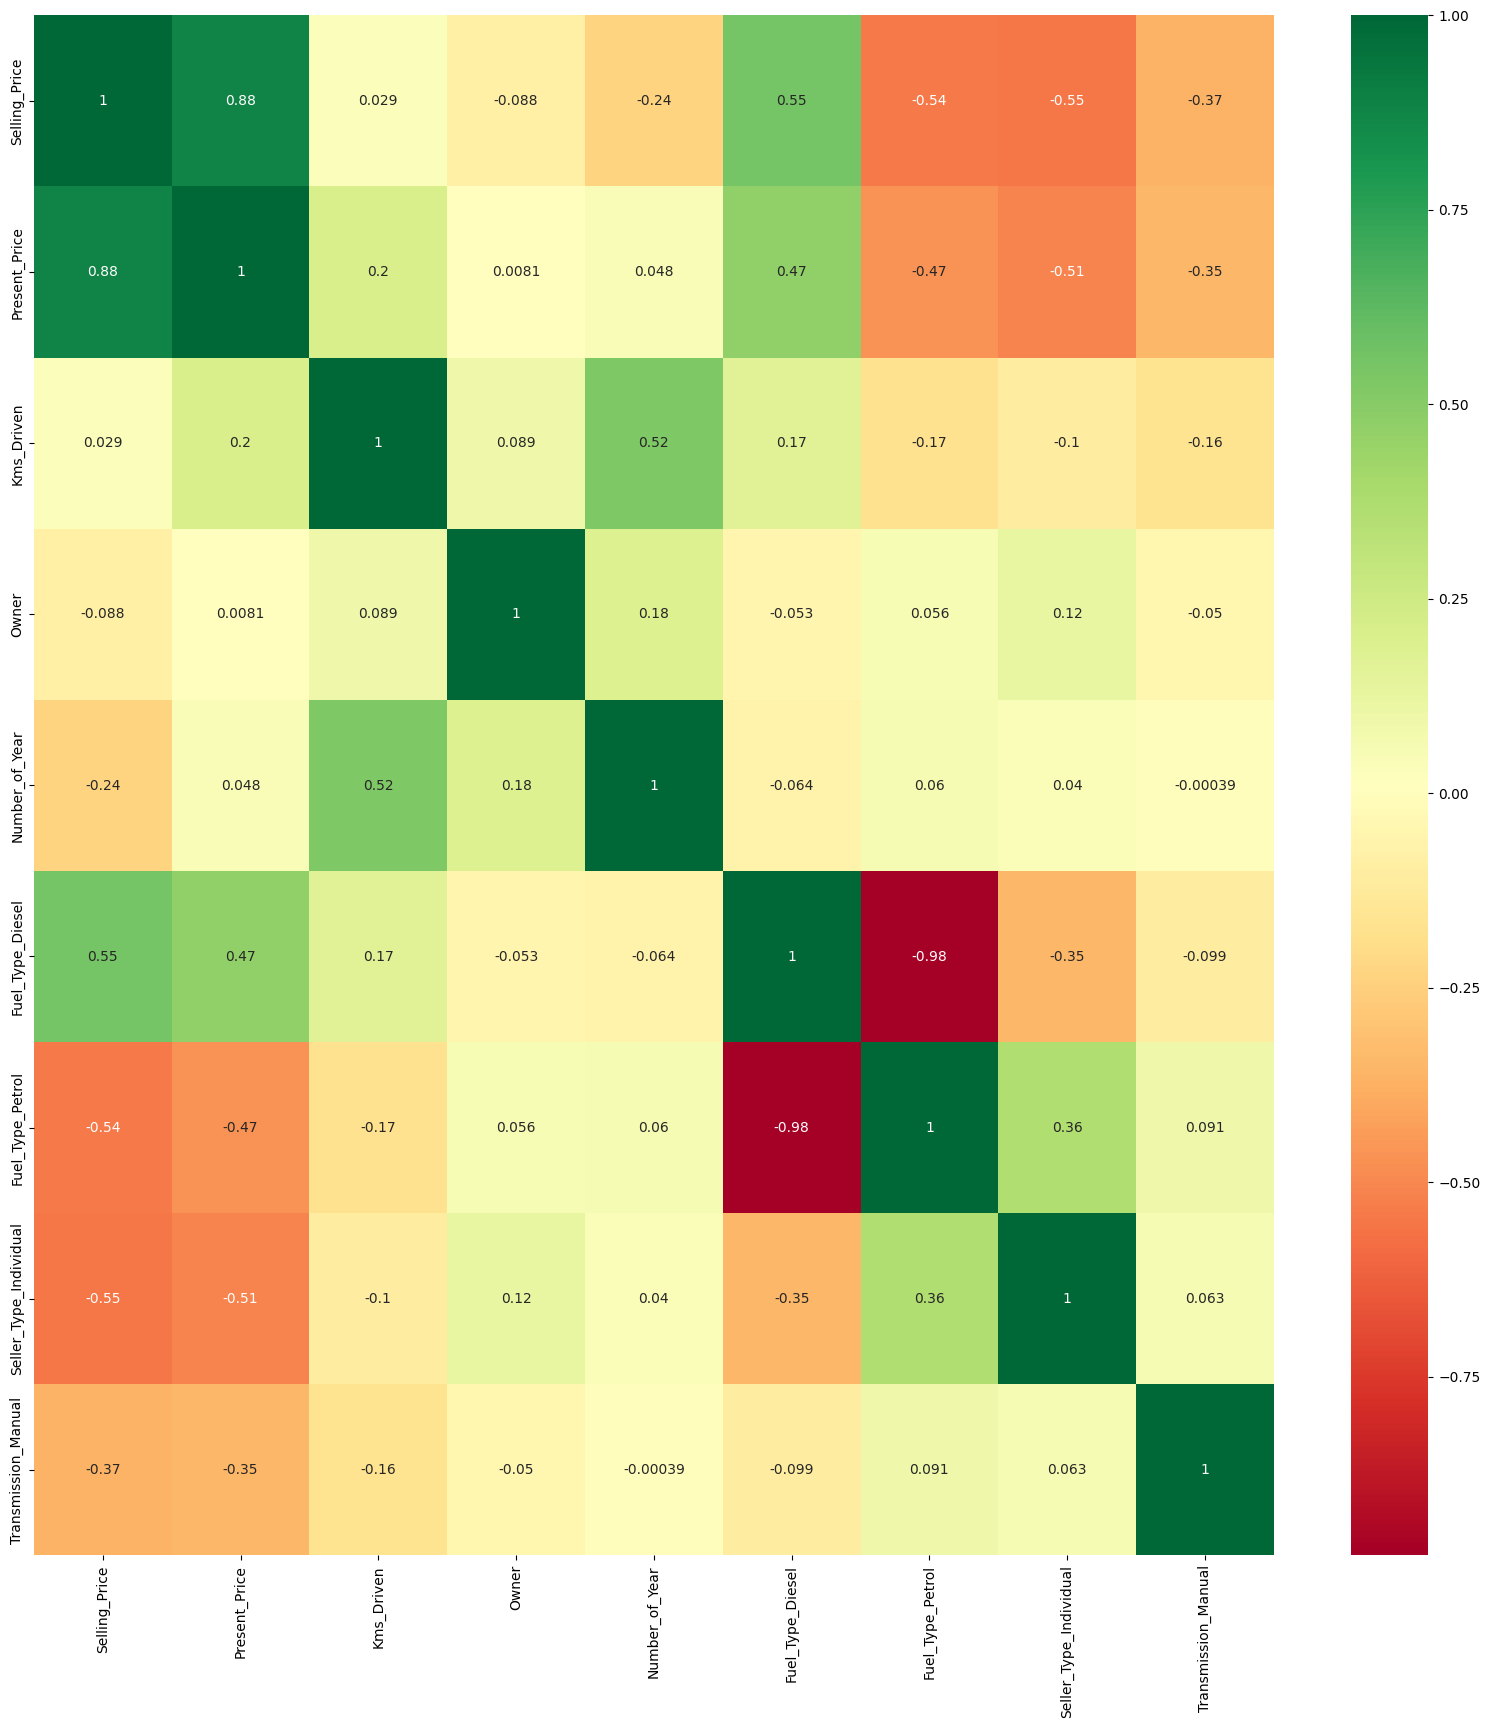

In [ ]:
corrmat = final_dataset.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# grean = highly corelated
# red = negarively corelated
# The annot=True parameter adds the values of the correlation coefficients to the heatmap, and the cmap="RdYlGn" parameter sets the color map for the heatmap.



dependent features and independent features

In [ ]:
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]
# predicting the selling price


In [ ]:
Y.head

<bound method NDFrame.head of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>

Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regressor algorithm from the scikit-learn library to train a machine learning model for regression analysis.
model=ExtraTreesRegressor()
model.fit(X,Y)


ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_) # imporatance of each features to predict the Y value 
# most important input features is (present_price = 0.397), heat map value is (0.88)

[0.40439927 0.04386885 0.00123858 0.07705027 0.20446404 0.01463752
 0.12863586 0.12570561]


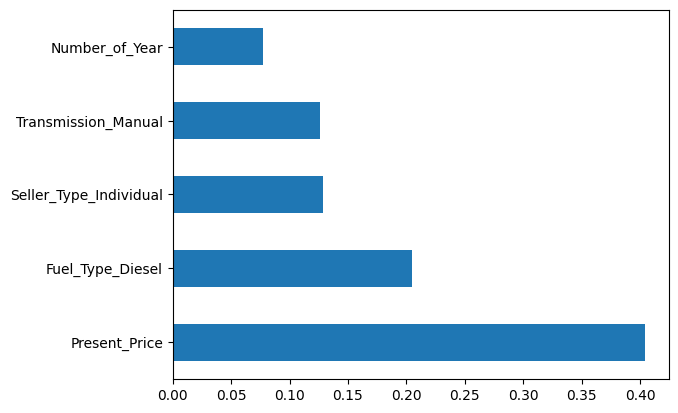

In [ ]:
# plot the importance of features 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()
# presrnt price has more importantce


Split the data set to train and test 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
X_train.shape

(240, 8)

Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor

In [ ]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #The number of decision trees in the random forest.
print(n_estimators) # it simply creates an array of 12 integer values that could be used as the n_estimators hyperparameter when creating a RandomForestRegressor model later on.

# number of features to concider at every split
# "auto", which means that the algorithm will consider all the features at each split.
# "sqrt" means that the algorithm will consider the square root of the total number of features at each split 
max_features = ['auto','sqrt']

# max numbers of leavels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV #tuning. It uses cross-validation to evaluate the performance of each combination of hyperparameters and returns the best combination of hyperparameters that result in the best performance on the given dataset.
# CV = cross validation 



In [ ]:
# creat a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,Y_train)

Predictions

In [ ]:
predictions= rf_random.predict(X_test)

In [ ]:
predictions

array([10.10034021,  4.51601535,  3.62342896,  4.43494564,  3.54933188,
        0.30746784,  3.01473919,  2.92695501,  7.37987742,  5.21706144,
        0.27067302,  0.37315032,  6.20433432,  0.54914775,  1.18110723,
        0.24418441, 12.91579577,  0.44183365,  6.74126227,  5.07979499,
        5.41874192,  0.46480222,  0.64036274,  4.61758391,  4.61891697,
        1.19745417,  7.37722896,  1.19258462, 10.05818816,  6.50256117,
        4.91419444,  6.71418408,  4.32055361,  2.88475972,  2.86884268,
        7.70708908,  4.56490032,  9.88819383,  1.17019568,  0.33269645,
        2.8704622 ,  1.2893621 ,  5.21706144,  0.59195936,  0.63843183,
        0.3650057 , 10.32062842,  5.48513883, 21.37810542,  5.07364031,
        4.92925239,  2.07140406,  9.86324713,  2.76848136,  3.37125415,
       12.25037942,  4.28414007,  5.74935904,  5.03162351,  5.70562083,
        1.17019568])

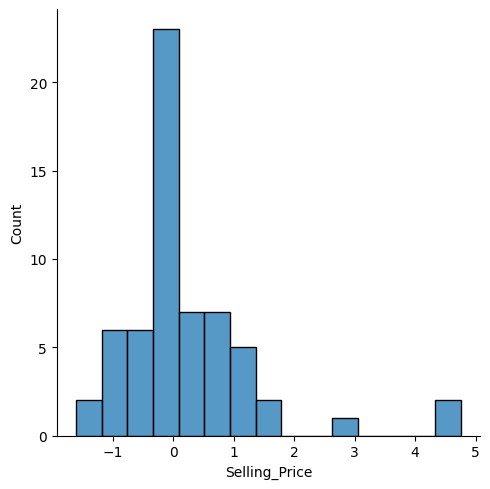

In [ ]:
sns.displot(Y_test-predictions)

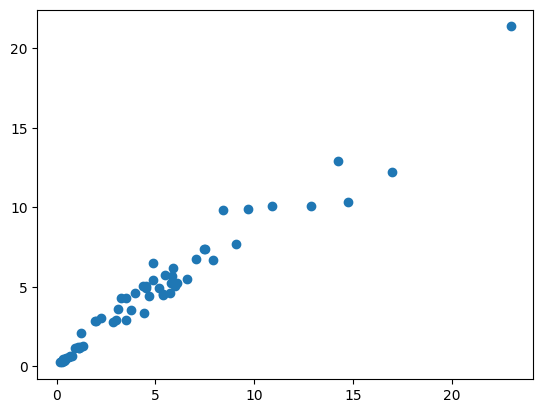

In [ ]:
plt.scatter(Y_test,predictions)

In [ ]:
import pickle

file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)  # R^2 score only measures the goodness of fit of the model
print('accuracy score:', r2) 

accuracy score: 0.9369868972353117
